# Worksheet 12

Name:  dayu li
UID: u61453443

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
YES.  The output is a binary variable (YES or NO).
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
NO. The output is a continuous variable representing the number of months.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
YES. It represents discrete categories (ratings) rather than a continuous spectrum.
4. Predicting the number of births occuring in a specified minute.
NO. The outcome is a count of events (births), which is a continuous variable.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

To learn a model and estimate its performance on unseen data, I can split the dataset into training and test sets, use cross-validation for robust evaluation, preprocess features, select an appropriate model, and train it. Evaluate the model on the test set using relevant metrics. 

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting occurs when a model is too simple to capture the underlying patterns of the data, leading to poor performance on both training and test data. Signs include low accuracy or high error on both sets. 
Overfitting happens when a model learns the noise in the training data, performing well on it but poorly on unseen data. Signs include high accuracy on training data but low accuracy on test data.

### K Nearest Neighbors

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

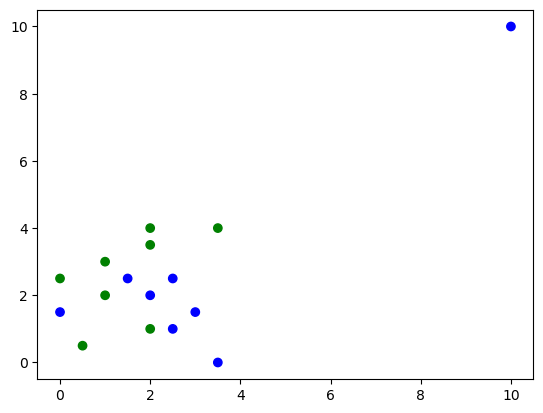

In [5]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

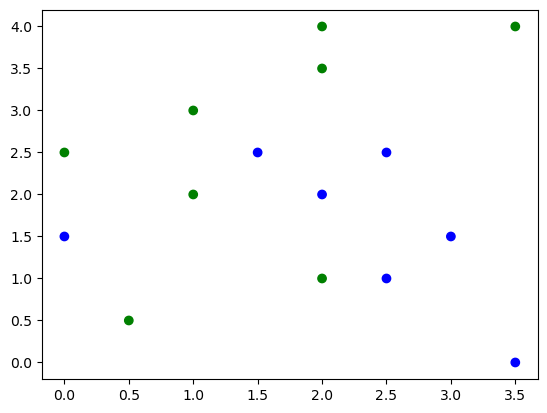

In [6]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

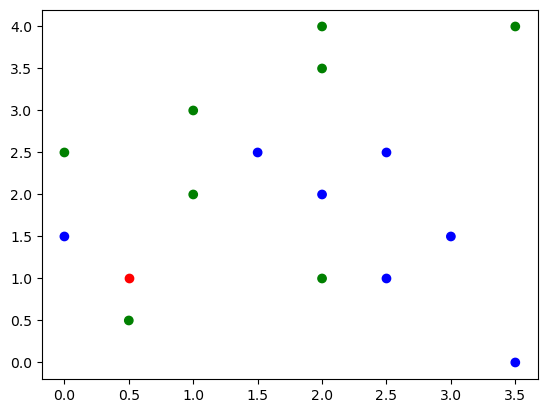

In [7]:
new_point_a = 0.5
new_point_b = 1

plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]], label='Existing Data')
plt.scatter(new_point_a, new_point_b, color='r', label='New Point')

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

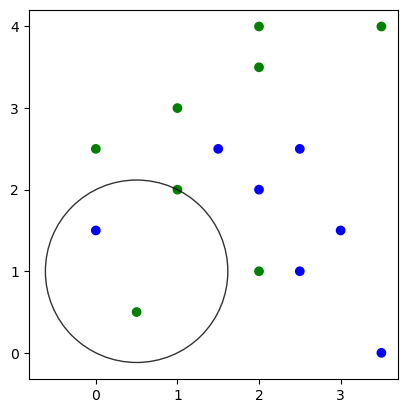

In [8]:
def n_closest_to(example, n, datap1):
    distances = []
    for point in datap1:
        dist = np.sqrt((point[1] - example[1])**2 + (point[0] - example[0])**2)
        distances.append((dist, point))
    distances.sort(key=lambda x: x[0])
    # returns points and the distance of the nth closest point
    return [x[1] for x in distances[:n]], distances[n-1][0]

location = (0.5, 1)
datap = list(zip(data["Attribute A"], data["Attribute B"]))

# Unpacking the returned values from n_closest_to correctly
closest_points, radius = n_closest_to(location, 3, datap)

_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]], label='Existing Data')
# Draw the circle using the correctly extracted radius
cir = plt.Circle(location, radius, fill=False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal')  # necessary so that the circle is not oval
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [9]:
def majority_class(points):
    class_counts = {0: 0, 1: 0}
    for point in points:
        # Find the index of the point in the original dataset to get its class
          for i, (a, b) in enumerate(zip(data["Attribute A"], data["Attribute B"])):
            if a == point[0] and b == point[1]:
                point_class = data["Class"][i]
                class_counts[point_class] += 1
                break

    # Determine the majority class
    if class_counts[0] > class_counts[1]:
        return 0
    elif class_counts[1] > class_counts[0]:
        return 1
    else:
        # Tie-breaking with a default class
        return 0  # Default class for tie-breaking

example_point = (0.5, 1)

# Assuming we have a function `n_closest_to_v2` that returns the closest points including their distances
closest_points,a = n_closest_to(example_point, 3,datap)

# Assign class to the new point based on the majority class of the closest points
assigned_class = majority_class(closest_points)
print("Assigned class to the new point:", assigned_class)

Assigned class to the new point: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [10]:
count = 0
for i in range(len(datap)):
    actual_class = data["Class"][i]
    test_point = datap[i]
    training_points = datap[:i] + datap[i+1:]
    closest_points, _ = n_closest_to(test_point, 3, training_points)
    prediction = majority_class(closest_points)
            
    if prediction == actual_class:
        count += 1

print("overall accuracy = ",count/len(datap))

overall accuracy =  0.7333333333333333


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

mnist_data = fetch_openml('mnist_784', version=1)

# Take a random sample of the dataset (5% of the data) because it takes me over an hour 
# waiting for the whole dataset and finally i gave it up.
sample_size = int(len(mnist_data.data) * 0.05)
random_indices = np.random.choice(len(mnist_data.data), sample_size, replace=False)

X_sample = mnist_data.data.iloc[random_indices]
y_sample = mnist_data.target.iloc[random_indices]

# Split the sampled data into training and testing sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=1
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2800, 784) (700, 784) (2800,) (700,)


b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

In [30]:
pip install numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install threadpoolctl==3.1.0

  Obtaining dependency information for threadpoolctl==3.1.0 from https://files.pythonhosted.org/packages/61/cf/6e354304bcb9c6413c4e02a747b600061c21d38ba51e7e544ac7bc66aecc/threadpoolctl-3.1.0-py3-none-any.whl.metadata
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


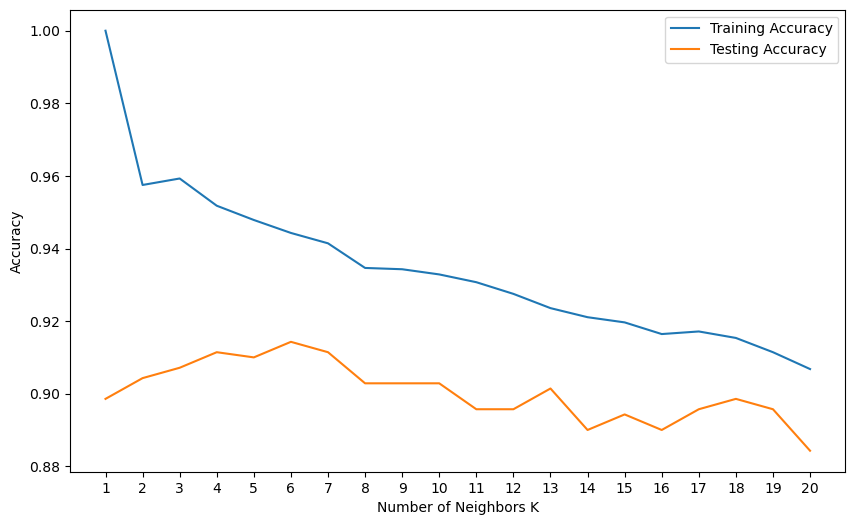

In [14]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
testing_accuracy = []

# K ranging from 1 to 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    training_accuracy.append(knn.score(X_train, y_train))
    testing_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), training_accuracy, label='Training Accuracy')
plt.plot(range(1, 21), testing_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21, step=1))
plt.legend()
plt.show()

In [ ]:
I think the choice is k=6.

The testing accuracy reaches the peak at k=6,
and the training accuracy is still relatively high at this point. 
It's a reasonable choice because itsuggesting good generalization without overfitting.

After k=9, the testing accuracy tends to decrease, 
which indicates that a higher k value may be introducing too much bias by considering too many neighbors, 
leading to poorer performance on the testing set.

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

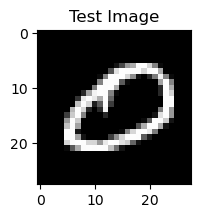

/Users/dayuli/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


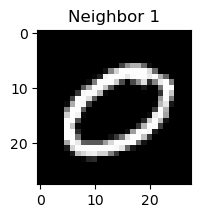

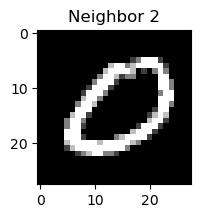

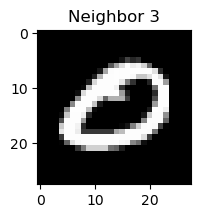

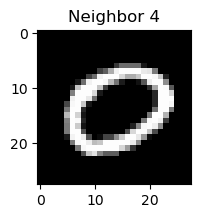

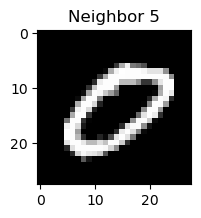

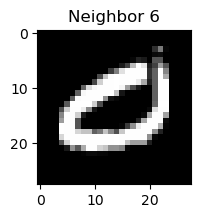

In [15]:
import random
index = random.randint(0, len(X_test))
test_image = X_test.iloc[index].values.reshape(28, 28) 
plt.figure(figsize=(2, 2))
plt.imshow(test_image, cmap='gray')
plt.title("Test Image")
plt.show()

knn_optimal = KNeighborsClassifier(n_neighbors=6)
knn_optimal.fit(X_train, y_train)

# Find the K nearest neighbors
distances, indices = knn_optimal.kneighbors([X_test.iloc[index]])

# Plot each neighbor
for i in range(len(indices[0])):
    neighbor_index = indices[0][i]
    neighbor_image = X_train.iloc[neighbor_index].values.reshape(28, 28)
    plt.figure(figsize=(2, 2))
    plt.imshow(neighbor_image, cmap='gray')
    plt.title(f"Neighbor {i+1}")
    plt.show()

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

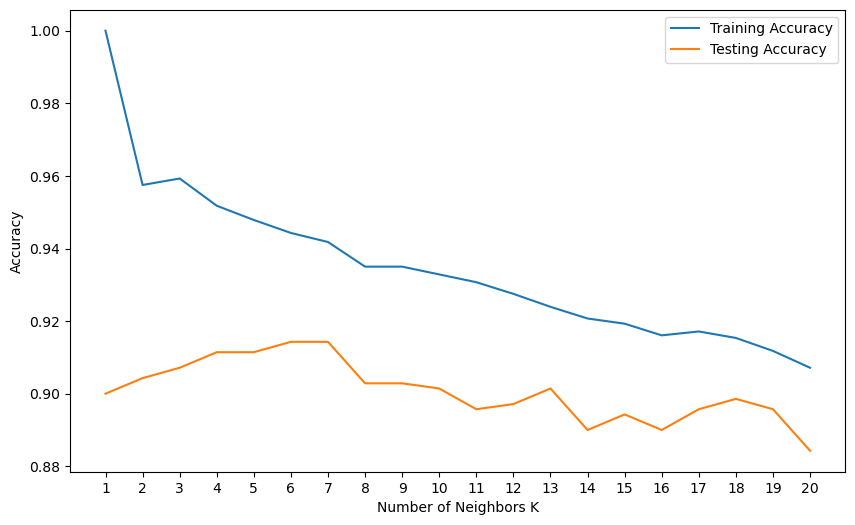

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

pca = PCA(n_components=500, svd_solver='randomized')  

training_accuracy = []
testing_accuracy = []

# K ranging from 1 to 20
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    model = make_pipeline(pca, knn_model)
    
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    testing_accuracy.append(model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), training_accuracy, label='Training Accuracy')
plt.plot(range(1, 21), testing_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21, step=1))
plt.legend()
plt.show()

I want to use PCA to reduce dimension. The computational efficiency may improve since the KNN algorithm will run in a lower-dimensional space, which is faster, especially for large datasets.
Depending on the dataset, accuracy might increase if PCA helps to remove noise and irrelevant features, or it might decrease if important information is lost during the dimensionality reduction.

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

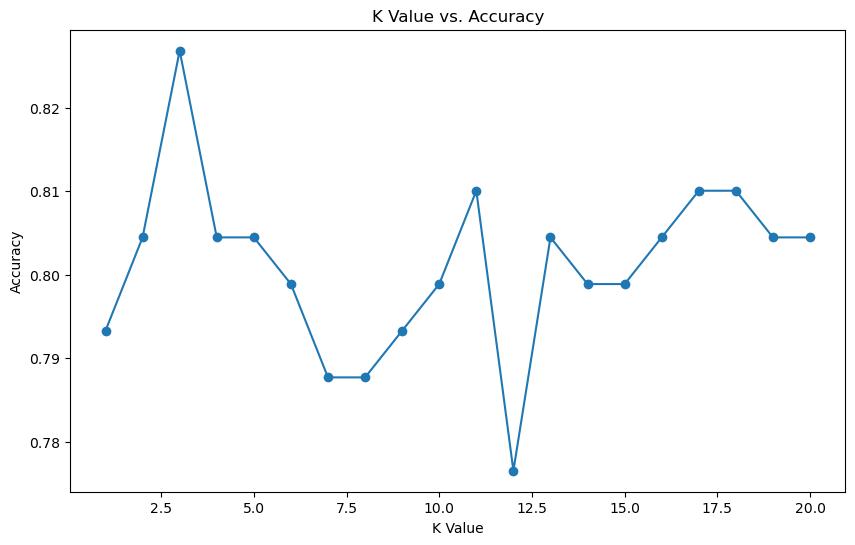

Validation Accuracy: 0.8100558659217877


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_submission_df = pd.read_csv("gender_submission.csv")

train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['Title'] = train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

features = ['Pclass', 'SibSp', 'Sex', 'Age', 'Parch']

combined_df = pd.concat([train_df[features], test_df[features]])

combined_df_encoded = pd.get_dummies(combined_df, columns=['Sex'])

imputer = SimpleImputer(strategy='most_frequent')
combined_df_encoded['Age'] = imputer.fit_transform(combined_df_encoded[['Age']])

train_df_encoded = combined_df_encoded.iloc[:len(train_df), :]
test_df_encoded = combined_df_encoded.iloc[len(train_df):, :]

X = train_df_encoded
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    predictions = knn.predict(X_val_scaled)
    scores.append(accuracy_score(y_val, predictions))

plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K Value vs. Accuracy')
plt.show()

knn = KNeighborsClassifier(n_neighbors=11)  
knn.fit(X_train_scaled, y_train)

predictions = knn.predict(X_val_scaled)
print("Validation Accuracy:", accuracy_score(y_val, predictions))

X_test_scaled = scaler.transform(test_df_encoded)

test_predictions = knn.predict(X_test_scaled)

submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_predictions})
submission.to_csv('submission.csv', index=False)


adding features:1. FamilySize by adding sibsp and parch 2. titles by split mr./mrs... from name

I use KNN on features = ['Pclass', 'SibSp', 'Sex', 'Age', 'Parch'] after some data cleaning.

k choice: 11 is the second peak and accuracy looks great on plot. Thus i choose 11 as k number.




In [ ]:
I didn't find a link of submission but my score is Score: 0.78468
the submission file is 'submission.csv'